# 1. Asset market equilibrium
(a) Define a financial markets equilibrium and write down a system of equations that characterize this equilibrium

Solution: Let $\theta^h_i$ denote agent $h$'s position for asset $i$, and $q_i$ denote the price of asset $i$ denominated in period-0 consumption good, then agent $h$'s problem is to solve
$$\max_{c_0^h,\theta_1^h,\theta_2^h} v(c_0^h)+\frac{1}{S} \sum_{s=1}^{S} v(c_s^h)$$
s.t. $$c_0^h = e_0^h - q_1 \theta^h_1 - q_2 \theta^h_2$$
$$c_s^h = e_s^h + \theta^h_1 A^1_s + \theta^h_2 A^2_s$$
By substituting the budget constraint into the maximization problem we have
$$\max_{\theta_1^h,\theta_2^h} v(e_0^h - q_1 \theta^h_1 - q_2 \theta^h_2)+\frac{1}{S}\sum_{s=1}^{S} v(e_s^h + \theta^h_1 A^1_s + \theta^h_2 A^2_s)$$
Take the FOCs with respect to $\theta_j^h$:
\begin{equation}
\frac{1}{S}\sum_{s=1}^{S} v'(e_s^h + \theta^h_1 A^1_s + \theta^h_2 A^2_s)A^j_s - q_j v'(e_0^h - q_1 \theta^h_1 - q_2 \theta^h_2)=0
\end{equation}

Definition: The equilibrium for the financial markets is an Arrow-Debrew equilibrium, characterized by agents' asset positions ${\theta^h_1,\theta^h_2}$ and asset prices ${q_1,q_2}$ that satisfy
1. The FOCs specified above
2. Asset market clearing: $$\theta^1_1 + \theta^2_1 = 0$$ and $$\theta^1_2 + \theta^2_2 = 0$$

(b) Use Python to compute the equilibrium prices and allocations allocations for $\gamma = 2$, $\gamma = 4$, $\gamma = 8$, $\gamma = 166$.

In [51]:
# The following code solves the asset market equilibrium
import numpy as np
from scipy.optimize import fsolve

def equilibrium_eqns(x,gamma):
    # Define asset payoff in different states
    A11 = 1
    A12 = 1
    A13 = 1
    A14 = 1
    A21 = 1
    A22 = 1
    A23 = 1.5
    A24 = 1.5
    # Define each agent's endowment in each state at period 1
    e11 = 1
    e12 = 2
    e13 = 1
    e14 = 2
    e21 = 3
    e22 = 1
    e23 = 3
    e24 = 1
    
    # The 6 elements of array x are: agent 1's position for assets 1 and 2; agent 2's position for assets 1 and 2;
    # and prices for assets 1 and 2
    return np.array([1/4*((e11+x[0]*A11+x[1]*A21)**(-gamma)*A11 + 
                         (e12+x[0]*A12+x[1]*A22)**(-gamma)*A12 +
                         (e13+x[0]*A13+x[1]*A23)**(-gamma)*A13 +
                         (e14+x[0]*A14+x[1]*A24)**(-gamma)*A14) -
                         x[4]*(1-x[4]*x[0]-x[5]*x[1])**(-gamma),
                    1/4*((e11+x[0]*A11+x[1]*A21)**(-gamma)*A21 + 
                         (e12+x[0]*A12+x[1]*A22)**(-gamma)*A22 +
                         (e13+x[0]*A13+x[1]*A23)**(-gamma)*A23 +
                         (e14+x[0]*A14+x[1]*A24)**(-gamma)*A24) -
                         x[5]*(1-x[4]*x[0]-x[5]*x[1])**(-gamma),
                    1/4*((e21+x[2]*A11+x[3]*A21)**(-gamma)*A11 + 
                         (e22+x[2]*A12+x[3]*A22)**(-gamma)*A12 +
                         (e23+x[2]*A13+x[3]*A23)**(-gamma)*A13 +
                         (e24+x[2]*A14+x[3]*A24)**(-gamma)*A14) -
                         x[4]*(1-x[4]*x[2]-x[5]*x[3])**(-gamma),
                    1/4*((e21+x[2]*A11+x[3]*A21)**(-gamma)*A21 + 
                         (e22+x[2]*A12+x[3]*A22)**(-gamma)*A22 +
                         (e23+x[2]*A13+x[3]*A23)**(-gamma)*A23 +
                         (e24+x[2]*A14+x[3]*A24)**(-gamma)*A24) -
                         x[5]*(1-x[4]*x[2]-x[5]*x[3])**(-gamma),
                    x[0]+x[2],
                    x[1]+x[3]])

sol1 = fsolve(equilibrium_eqns,[0.,0.,0.,0.,0.,0.],args=2)
sol2 = fsolve(equilibrium_eqns,[0.,0.,0.,0.,0.,0.],args=4)
sol3 = fsolve(equilibrium_eqns,[0.,0.,0.,0.,0.,0.],args=8)
sol4 = fsolve(equilibrium_eqns,[0.,0.,0.,0.,0.,0.],args=166)

print(sol1)

[ 1.95406655e-02 -1.22992955e-15 -1.95406655e-02  1.22992955e-15
  5.89777656e-01  7.37222070e-01]


# 3. Ramsey Model
Suppose there is a single agent with $\beta = 0.9, v(c) = \log(c)$, there are two states which are iid with equal probabilities $\pi_1 = \pi_2 = 0.5$ and the firm's production function is $$f(k,1) = 0.9k^{0.3} + 0.3k,\; f(k,2) = 1.1k^{0.3}+0.9k$$
Discretize the possible capital values to 50 points. Use value function iteration to compute the policy functions (one for each shock) for consumption and investment. Plot these functions. Now use 500 points for admissible capital levels and redo the exercise.

Solution: Let $z$ denote the state, and assume that capital depreciates fully in each period. The problem of the agent can be summarized by the Bellman equation below: $$V(z,k) = \max_{c,k'} v(c)+\beta \mathbb E_{z'|z}[V(z',k')]$$
s.t. $$c+k'=f(k,z)$$
By substituting the budget constraint into the Bellman equation we get $$V(z,k) = \max_{k'} v(f(k,z)-k') + \beta \mathbb E_{z'|z}[V(z',k')]$$

1.0832478088006379
0.0032845620332686565
1.6927894375129426e-05
128


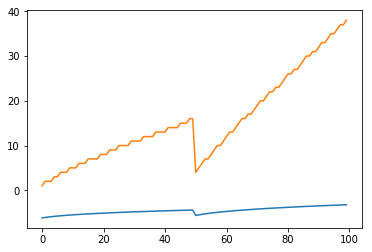

In [129]:
import numpy as np
from matplotlib import pyplot as plt

bbeta = 0.9
v = lambda c: np.log(c)
nk = 50
nz = 2
tol = 1e-6
maxDiff = np.inf
kgrid = np.linspace(0.2,2.0,nk)
zTransition = 0.5*np.ones((nz,1))
V = np.zeros((nk*nz,1))
tempV = np.zeros((nk*nz,1))
gk = np.zeros((nk*nz,1))

niter = 1
while maxDiff > tol:
    Vm = np.reshape(V,(-1,nk)).T
    VnextExp = Vm @ zTransition  
                              
    for i in range(nk*nz):
        ik = int(np.floor(np.mod(i,nk)))
        iz = int(np.mod(np.floor((i)/nk),nz))
        vv = -np.inf
        
        k = kgrid[ik]
        if iz == 0:
            f_k = 0.9*k**0.3 + 0.3*k
        else:
            f_k = 1.1*k**0.3 + 0.9*k
                      
        for ikp in range(nk):
            kp = kgrid[ikp]
            c = f_k - kp
            
            if c <= 0:
                break
           
            value = v(c) + bbeta*VnextExp[ikp]
                
            if value > vv:
                vv = value
                kChoice = ikp
                
        tempV[i] = vv
        gk[i] = kChoice
    
    maxDiff = np.max(np.abs(V-tempV))
    V = np.copy(tempV)    
    
    if niter == 1 or np.mod(niter,50) == 0:
        print(maxDiff)
        
    niter = niter + 1
    
plt.plot(V)
print(niter)
plt.plot(gk)
plt.show()